In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2, l1

In [7]:
df = pd.read_csv('./datasets/cleaned_data/model_data.csv')

# Info

In [8]:
df.head()

,cond,age,color,breed,target
0,normal,Senior,black,dachshund,1
1,aged,Senior,tan,chihuahua,0
2,normal,Senior,sable,labrador retriever,1
3,normal,Senior,black,german shepherd,1
4,normal,Senior,cream,american eskimo,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13120 entries, 0 to 13119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cond    13120 non-null  object
 1   age     13120 non-null  object
 2   color   13120 non-null  object
 3   breed   13120 non-null  object
 4   target  13120 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 512.6+ KB


# Minor changes, might have to remove once Gene's cleaning is done

In [10]:
# filter out deceased, missing, euthanasia, died, disposal, and missing outcomes
# df = df[(df['outcome'] == 'adoption') | (df['outcome'] == 'transfer') | (df['outcome'] == 'return_owner')]

In [11]:
# df.dropna(inplace=True)

In [12]:
# create new column for adoption
# 1 = adopted, 0 = owner_return or transfer
# df['adopted'] = df['outcome'].map({'adoption':1, 'return_owner':0, 'transfer':0})

In [13]:
# df['time_in_shelter'] = pd.to_timedelta(df['time_in_shelter'])
# df['time_in_shelter'] = df['time_in_shelter'].dt.days

# Functions

In [14]:
# Function taken from lesson, created by Jeff
def plot_hist(hist):
    """ plot the results from neural net training 
    
    Args:
        hist (TF history object): The history of the training
    
    Returns: 
        None
    """
    
    plt.figure(figsize=(12, 8))

    plt.plot(hist.history['accuracy'], label='Train')
    plt.plot(hist.history['val_accuracy'], label='Validation')

    plt.title('NN Performance on Shelter Data', fontsize=25)
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel('Accuracy', fontsize=18)


    plt.legend(fontsize=18);

# NN Model

In [15]:
X = df.drop(columns='color')
X = pd.get_dummies(df).drop(columns=['target'])


y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y)


In [16]:
y.value_counts(normalize=True)

0    0.512805
1    0.487195
Name: target, dtype: float64

In [17]:
X

,cond_aged,cond_behavior,cond_injured,cond_normal,cond_nursing,cond_other,age_Adult,age_Baby,age_Senior,age_Young,...,breed_tibetan spaniel,breed_tibetan terrier,breed_toy fox terrier,breed_toy poodle,breed_vizsla,breed_weimaraner,breed_welsh terrier,breed_west highland white terrier,breed_whippet,breed_yorkshire terrier
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13115,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13116,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13117,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13118,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Epoch 1/50
10/10 [==============================] - 2s 19ms/step - loss: 0.6828 - accuracy: 0.5497 - val_loss: 0.6612 - val_accuracy: 0.5860
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6642 - accuracy: 0.5920 - val_loss: 0.6528 - val_accuracy: 0.6140
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6548 - accuracy: 0.6062 - val_loss: 0.6464 - val_accuracy: 0.6049
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6496 - accuracy: 0.6152 - val_loss: 0.6428 - val_accuracy: 0.6177
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6440 - accuracy: 0.6207 - val_loss: 0.6405 - val_accuracy: 0.6223
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6381 - accuracy: 0.6271 - val_loss: 0.6387 - val_accuracy: 0.6247
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6368 - accuracy: 0.6326 - val_loss: 0.6373 - val_accuracy: 0.6250
Epoch 8/50
10/10 [=

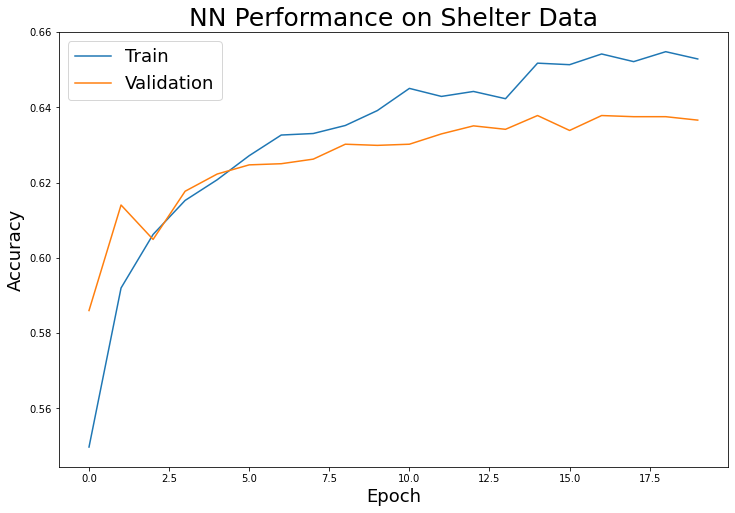

In [18]:
model = Sequential()

model.add(Dense(512, activation='relu')), #  kernel_regularizer=l2(.01))
model.add(Dropout(.6))
model.add(Dense(512, activation='relu')),
model.add(Dropout(.6))
# model.add(Dense(256, activation='relu')),
# model.add(Dropout(.5))
# model.add(Dense(256, activation='relu')),
# model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='bce', metrics=['accuracy'])

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=1024,
    epochs=50,
    callbacks=EarlyStopping(patience=5, monitor='val_accuracy', min_delta=.001)
)

plot_hist(history)

# XGBClassifier

In [19]:
XGBClassifier().get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [20]:
xgb = XGBClassifier(
    n_estimators=75, 
    use_label_encoder=False,
    max_depth=25,
    learning_rate=0.1,
    reg_alpha=10,
    random_state=123,
    # objective='binary:logistic',
    # reg_lambda=.001,
    # colsample_bytree=1,
    eval_metric='error',      # what metric here?
    tree_method='gpu_hist', 
    gpu_id=0
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=25, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=75, n_jobs=20,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [21]:
print('Train Score: ', xgb.score(X_train, y_train))
print('Train Score: ', xgb.score(X_test, y_test))

Train Score:  0.6552845528455284
Train Score:  0.6420731707317073


# Voting Classifier Ensemble

In [22]:
vc = VotingClassifier(
    [
        'nn', model,
        'xgb', xgb
    ]
)

In [ ]:
vc.fit()